In [1]:
import sys
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install mpmath
!{sys.executable} -m pip install powerlaw

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import powerlaw
from scipy.io import loadmat
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

In [6]:
x = loadmat('/Users/harangju/Developer/synth.mat')

In [7]:
x['durs'].shape

(16, 12)

In [8]:
x['durs'][0][0][0]

array([3, 3, 1, ..., 2, 1, 2], dtype=uint8)

In [9]:
i=0
j=0
d = x['durs'][i][j][0]
fit = powerlaw.Fit(d, xmin=min(d), xmax=max(d), discrete=True)
# fit = powerlaw.Fit(d, xmin=min(d), xmax=30)
# fit = powerlaw.Fit(d)
print('({},{}), a={}, s={}'.format(fit.xmin, fit.xmax, fit.alpha, fit.sigma))

(1.0,11.0), a=2.3931779134864826, s=0.013931779134864826


#### Power law

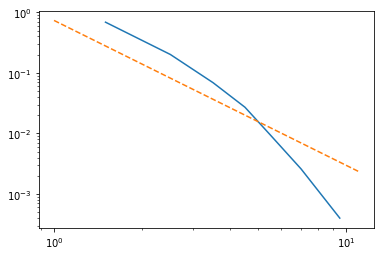

In [11]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(linestyle='--', ax=fig)

#### Truncated power law

Assuming nested distributions


(-319.9081708828181, 0.0)

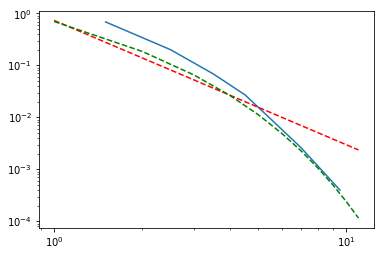

In [12]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.truncated_power_law.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'truncated_power_law')

In [17]:
vars(fit.truncated_power_law)

{'Asquare': inf,
 'D': 0.022868132061388602,
 'D_minus': 0.022868132061388602,
 'D_plus': 9.999999999998899e-05,
 'Kappa': 0.9932108314153799,
 'Lambda': 0.6316128423838914,
 'V': 0.02296813206138859,
 'alpha': 1.000000797237493,
 'discrete': True,
 'discrete_approximation': 'round',
 'fit_method': 'Likelihood',
 'loglikelihood': -9474.614265451133,
 'noise_flag': False,
 'parameter1': 1.000000797237493,
 'parameter1_name': 'alpha',
 'parameter2': 0.6316128423838914,
 'parameter2_name': 'lambda',
 'parameter3': None,
 'parameter3_name': None,
 'parent_Fit': <powerlaw.Fit at 0x10a364a20>,
 'xmax': 11.0,
 'xmin': 1.0}

In [19]:
vars(fit.exponential)

{'Asquare': inf,
 'D': 0.017760773215010683,
 'D_minus': 0.017760773215010683,
 'D_plus': 0.006692751205737313,
 'Kappa': 0.9999978595553825,
 'Lambda': 1.1060258147627655,
 'V': 0.024453524420747996,
 'discrete': True,
 'discrete_approximation': 'round',
 'fit_method': 'Likelihood',
 'loglikelihood': -9484.716889570978,
 'noise_flag': False,
 'parameter1': 1.1060258147627655,
 'parameter1_name': 'lambda',
 'parameter2': None,
 'parameter2_name': None,
 'parameter3': None,
 'parameter3_name': None,
 'parent_Fit': <powerlaw.Fit at 0x10a364a20>,
 'xmax': 11.0,
 'xmin': 1.0}

#### Exponential

(-43099.61526988556, 0.0)

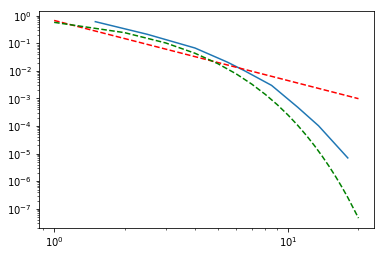

In [19]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.exponential.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'exponential')

#### Lognormal

(-46663.80170567283, 0.0)

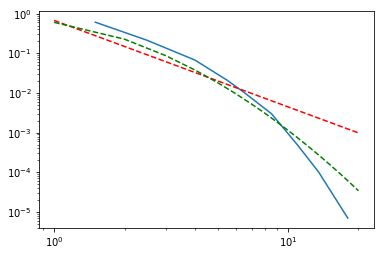

In [20]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.lognormal.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'lognormal')